<a href="https://colab.research.google.com/github/NeemaN10/CE880/blob/main/Case_study_fetal_health1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  ##IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
#np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install xgboost

In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [ ]:
df=pd.read_csv('C:\\Users\\neema\\OneDrive\\Desktop\\Essex Class\\CE880 SP  An Approachable Introduction to Data Science (Spring)\\fetal_health.csv')

LOADING DATA

Extract first 10 rows

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

There are 2126 rows and 22 columns


In [ ]:
df.shape

(2126, 22)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# counts for the accelerations column
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

Count plot

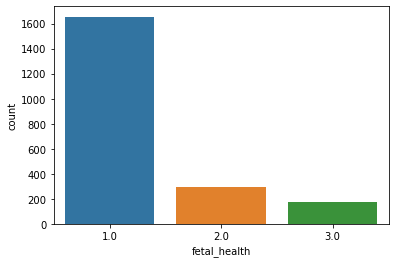

In [ ]:
sbn.countplot(x="fetal_health",data = df)
mlt.show()

Pie plot

<AxesSubplot:title={'center':'Pie chart of fetal health'}, ylabel='fetal_health'>

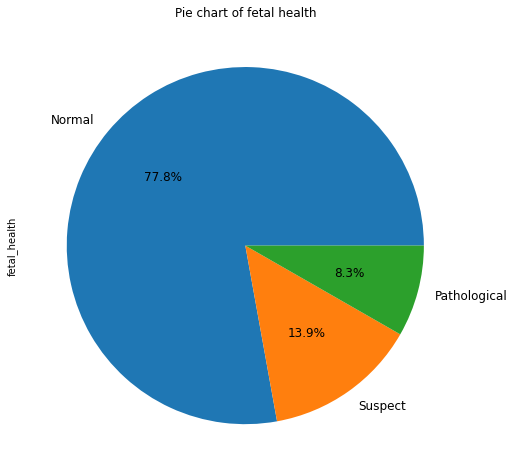

In [ ]:
df2=df.copy(deep=True)
pie1=pd.DataFrame(df2['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspect').replace(3.0,'Pathological').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of fetal health',y = 'fetal_health', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=12, figsize=(8,10))

Histrogram of all the features

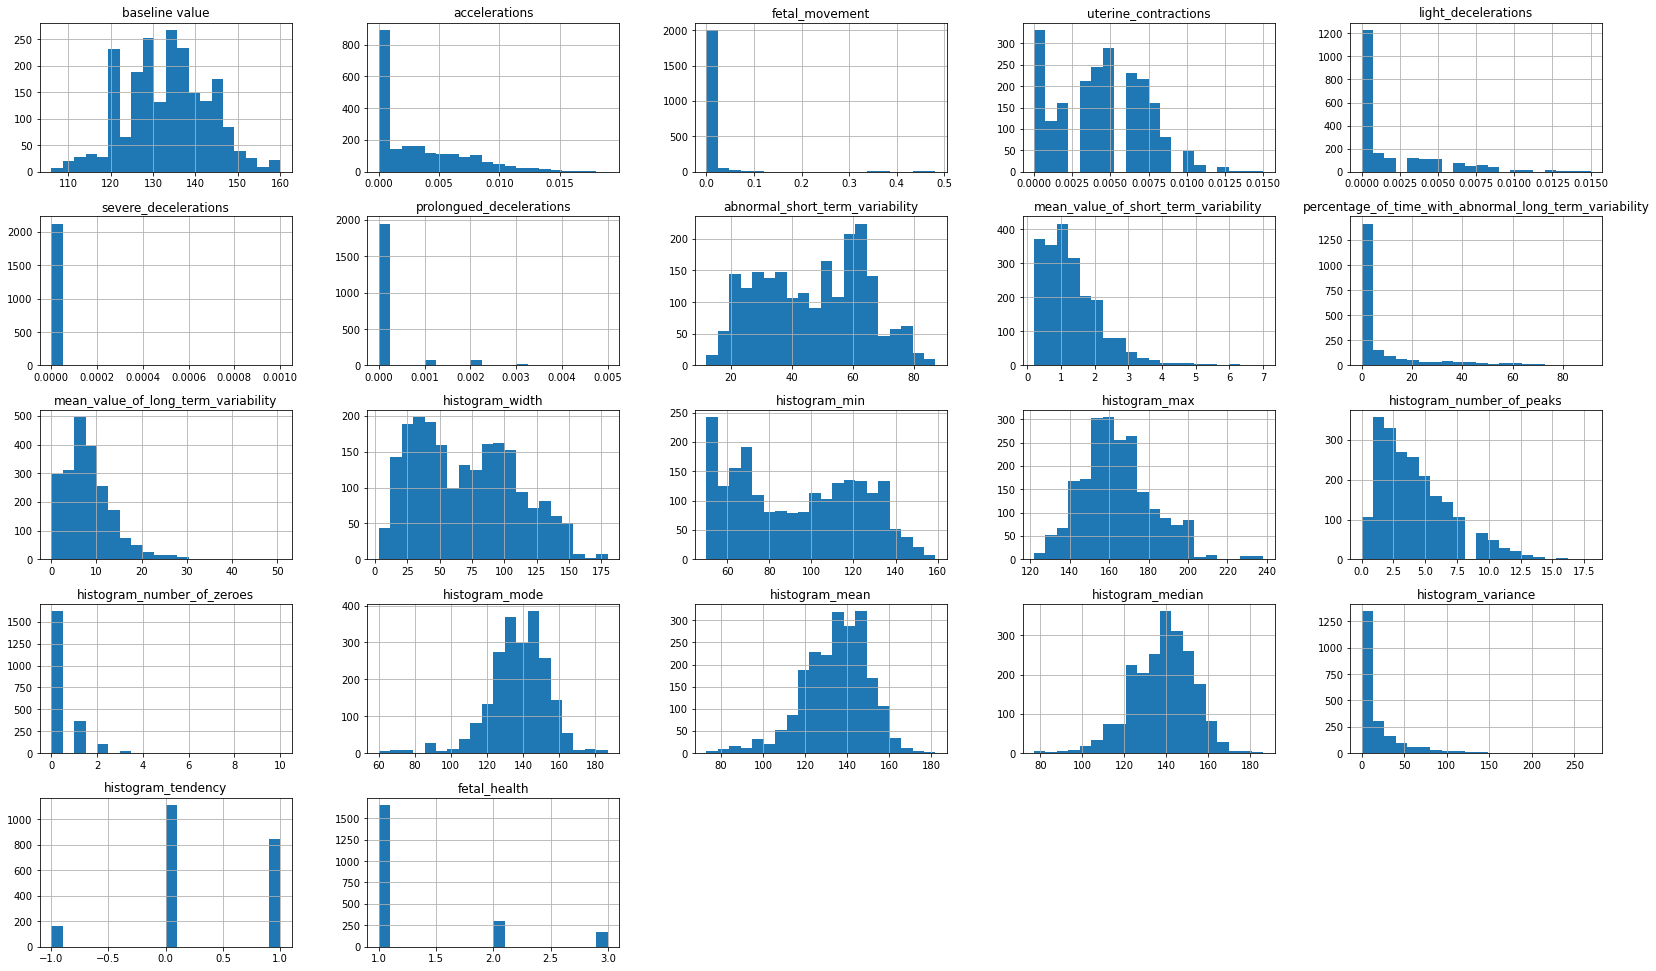

In [ ]:
df.hist(figsize=(28,17), bins = 20)
mlt.show()

Box plot to find the outlier

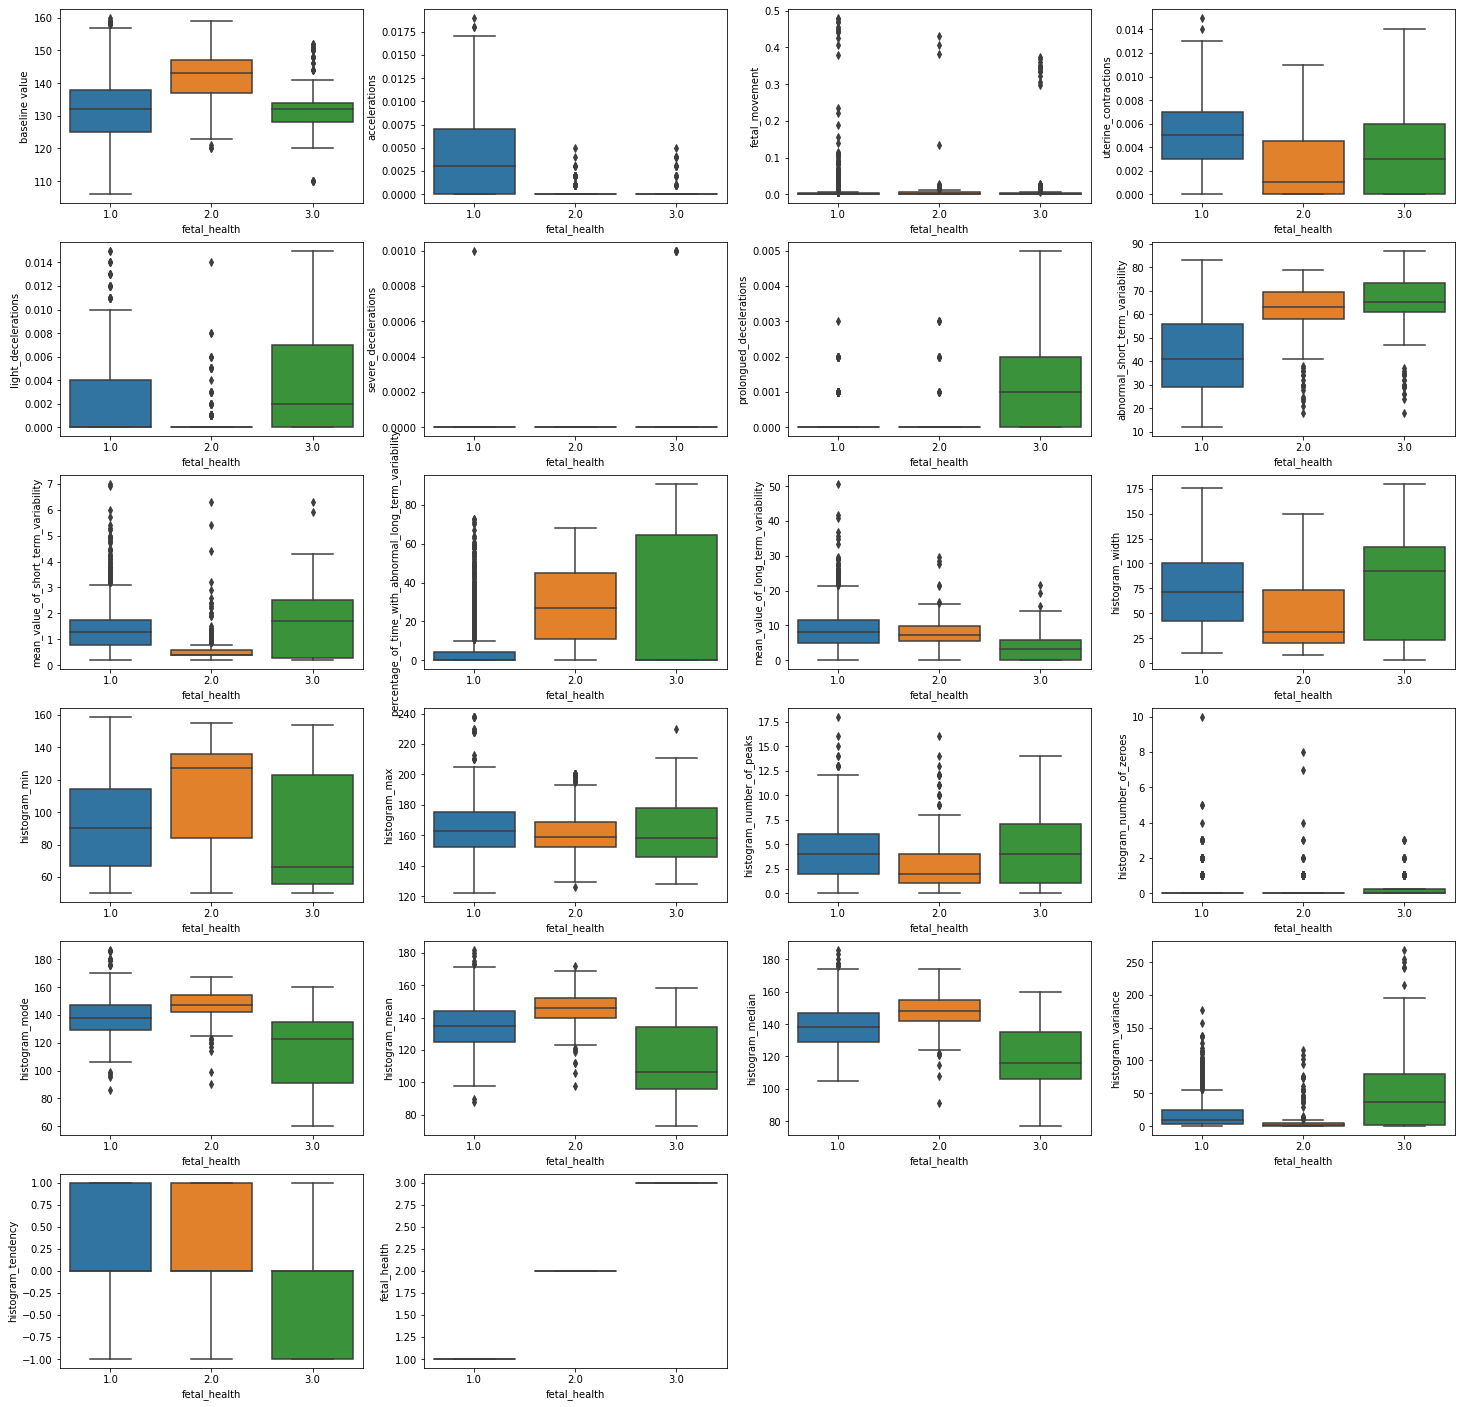

In [ ]:
mlt.figure(figsize=(25,25))
i=1
for col in df.columns:
    mlt.subplot(6,4,i)
    sbn.boxplot(x = 'fetal_health', y = col, data = df)
    i+=1

Remove the outliers to get balance data

In [ ]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************')
    
    df = df1.copy()

    return df

In [ ]:
df = removeOutlier(df.histogram_variance, df)
df = removeOutlier(df.histogram_median, df)
df = removeOutlier(df.histogram_mean, df)
df = removeOutlier(df.histogram_mode, df)
df = removeOutlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = removeOutlier(df.mean_value_of_short_term_variability, df)

lowerbound:  -68.12481771467543  -------- upperbound:  105.74099833555971
44  number of outliers from  2126
 ******************************************************
lowerbound:  96.21293175778905  -------- upperbound:  180.71886459187473
17  number of outliers from  2082
 ******************************************************
lowerbound:  92.08366378331934  -------- upperbound:  178.71246212467096
17  number of outliers from  2065
 ******************************************************
lowerbound:  97.08081110895039  -------- upperbound:  180.2912592035496
17  number of outliers from  2048
 ******************************************************
lowerbound:  -45.780257839676395  -------- upperbound:  66.39473346744597
57  number of outliers from  2031
 ******************************************************
lowerbound:  -1.1711686306789288  -------- upperbound:  3.781908245673867
30  number of outliers from  1974
 ******************************************************


Row become less

In [ ]:
df.shape

(1944, 22)

Heatmap to define corelation

<AxesSubplot:>

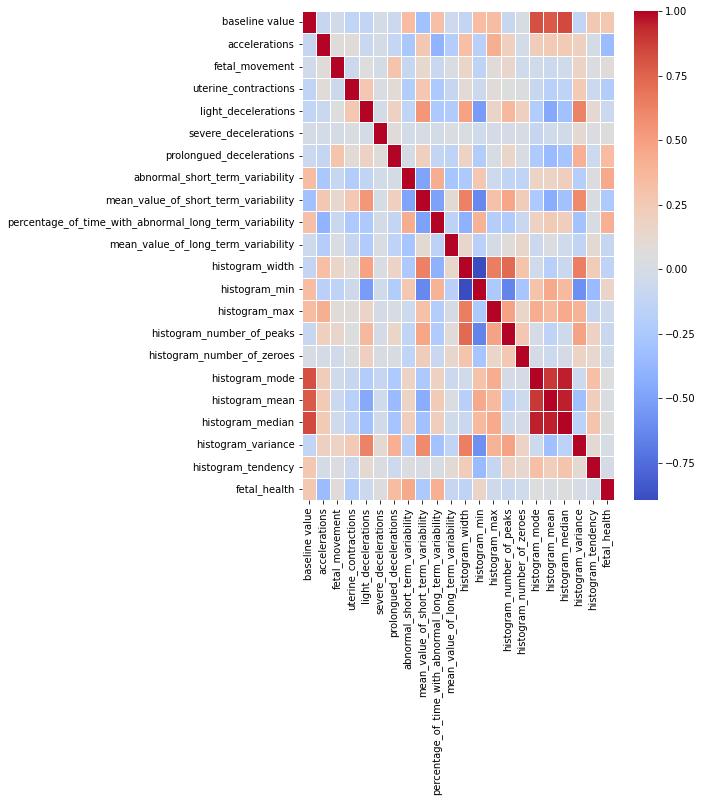

In [ ]:
mlt.figure(figsize = (7,9))
corr = df.corr()
sbn.heatmap(corr, cmap = 'coolwarm', linewidth = 0.5)

In [ ]:
df.fetal_health.value_counts()

1.0    1601
2.0     283
3.0      60
Name: fetal_health, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.fetal_health==1]
df_2 = df[df.fetal_health==2]
df_3 = df[df.fetal_health==3]
 
# Upsample minority class
df_2_upsampled = resample(df_2, replace=True,n_samples=1601,random_state=123)    # sample with replacement, # to match majority class,# reproducible results
df_3_upsampled = resample(df_3,replace=True,n_samples=1601,random_state=123) # sample with replacement
                                      
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled, df_3_upsampled])
 
# Display new class counts
df_upsampled.fetal_health.value_counts()

1.0    1601
2.0    1601
3.0    1601
Name: fetal_health, dtype: int64

Separating Fetures and Target Variable

In [ ]:
x = df_upsampled.drop('fetal_health', axis = 1)
y = df_upsampled['fetal_health'] 

Feature Scaling: Standardization

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

Evaluator Function:
Accuracy, Precision, Recall, f1-Score, roc_auc_score and Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))
    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    mlt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)

Buliding model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(x_test,y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 98.4179850124896


In [ ]:
#K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
KNeighborsClassifierScore = knn.score(x_test,y_test)
print("Accurac
      y obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

In [ ]:
#XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(x_train, y_train);

[02:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
XGBClassifierScore = xgb.score(x_test,y_test)
print("Accuracy obtained by XGB Classifier model:", XGBClassifierScore*100)

Accuracy obtained by XGB Classifier model: 98.66777685262281


In [ ]:
#AdaBoost:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)

abc.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [ ]:
AdaBoostClassifiescore = abc.score(x_test,y_test)
print("Accuracy obtained by AdaBoostClassifier Classifier model:",AdaBoostClassifiescore*100)

Accuracy obtained by AdaBoostClassifier Classifier model: 83.51373855120733


In [ ]:
#Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.7, subsample=0.9)

In [ ]:
StochasticGradientBoostingScore = sgb.score(x_test,y_test)
print("Accuracy obtained by Stochastic Gradient Boosting model:", StochasticGradientBoostingScore*100)

Accuracy obtained by Stochastic Gradient Boosting model: 97.66860949208993


In [ ]:
#Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(x_train, y_train)

In [ ]:
logistic_regrescore = lr.score(x_test,y_test)
print("Accuracy obtained by AdaBoostClassifier Classifier model:",logistic_regrescore*100)

Accuracy obtained by AdaBoostClassifier Classifier model: 86.26144879267277


In [ ]:
#comparing the model with test score

In [ ]:
from sklearn import model_selection
models = {'RandomForestClassifier': RandomForestClassifier(),
'KNeighborsClassifier': KNeighborsClassifier(),
'XGBClassifier': XGBClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier(),
'LogisticRegressionCV': LogisticRegressionCV()}

In [ ]:
for css,css_fun in models.items():
    css_fun.fit(x_train,y_train)

#Testing the model

print('Test Score')
for css,css_fun in models.items():
    score = css_fun.score(x_test,y_test)
    per_score =  (score*100)
    print(css, ' : ' ,(per_score))

[02:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Score
RandomForestClassifier  :  98.16819317235637
KNeighborsClassifier  :  94.08825978351373
XGBClassifier  :  98.66777685262281
AdaBoostClassifier  :  86.17818484596171
GradientBoostingClassifier  :  98.0849292256453
LogisticRegressionCV  :  83.34721065778517


In [ ]:
#printing classification report for Randomforest

model = XGBClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('Classification Report for XGBClassifier','\n')
print(classification_report(y_test,pred))

[02:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report for XGBClassifier 

              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       414
         2.0       0.96      1.00      0.98       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201



In [ ]:
con_mtx = confusion_matrix(y_test,pred)
pd.DataFrame(con_mtx)

,0,1,2
0,398,16,0
1,0,400,0
2,0,0,387


<AxesSubplot:>

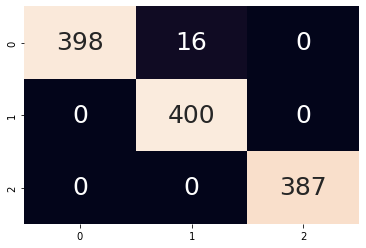

In [ ]:
sbn.heatmap(con_mtx, annot=True, cbar=False, fmt = 'g', annot_kws={'size':25})
